# Data from Kaggle

Data was obatined in Kaggle at: https://www.kaggle.com/competitions/titanic/data

Important informations from Kaggle:

**Variable Notes**

---



---


pclass: A proxy for socio-economic status (SES)
1st = Upper ;
2nd = Middle ;
3rd = Lower ;

---


age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

---


sibsp: The dataset defines family relations in this way...

---


Sibling = brother, sister, stepbrother, stepsister

---


Spouse = husband, wife (mistresses and fiancés were ignored)

---


parch: The dataset defines family relations in this way...

---


Parent = mother, father

---


Child = daughter, son, stepdaughter, stepson

---


Some children travelled only with a nanny, therefore parch=0 for them.

# Analising data
Importing csv files.

In [ ]:
import pandas as pd

In [ ]:
gender_data = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [ ]:
gender_df = pd.DataFrame(gender_data)
test_df = pd.DataFrame(test_data)
train_df = pd.DataFrame(train_data)

In [ ]:
gender_df.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning and processing


In [ ]:
#Combining

test_train = pd.concat([train_df, test_df], axis=0)
test_train = test_train.reset_index()
test_train.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
test_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [ ]:
test_train.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
test_train.isnull().mean()

index          0.000000
PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

In [ ]:
test_train = test_train.drop(columns=['Cabin'], axis=1)

In [ ]:
test_train['Age'] = test_train['Age'].fillna(test_train['Age'].mean())
test_train['Fare'] = test_train['Fare'].fillna(test_train['Fare'].mean())


In [ ]:
test_train['Embarked'] = test_train['Embarked'].fillna(test_train['Embarked'].mode()[0])

In [ ]:
test_train.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# In Train data:

In [ ]:
new_train_df = test_train.iloc[:891].copy()

In [ ]:
new_train_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0.0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.881138,1,2,W./C. 6607,23.4500,S
889,889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## What percentage of passengers survived the Titanic?

In [ ]:
survived = new_train_df["Survived"].sum()
dead = len(new_train_df) - survived
percent_survived = 100*(survived/len(train_df))
print(f"Percentage of passengers who survived = {percent_survived:.2f} %")

Percentage of passengers who survived = 38.38 %


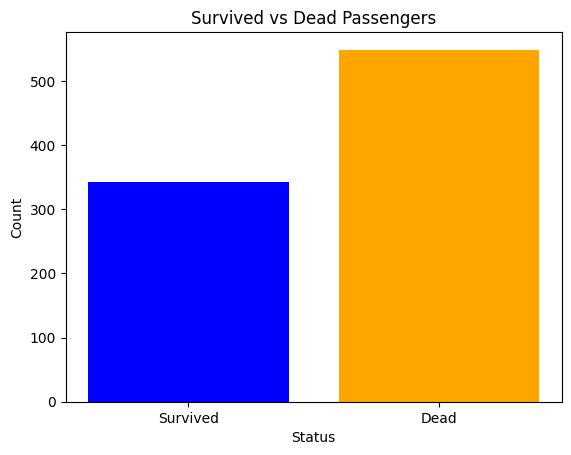

In [ ]:
colors = ['blue', 'orange']
plt.bar(['Survived', 'Dead'], [survived, dead], color = colors)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Survived vs Dead Passengers')
plt.show()

##  What was the survival rate for males vs. females?


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_columns(x='', y=''):
    survived = new_train_df.loc[new_train_df[x] == 1, :][y].value_counts()
    data_plot = pd.DataFrame([survived])
    data_plot.index = ['survived']
    data_plot.plot(kind='bar', rot=0)
    plt.show()
    return data_plot

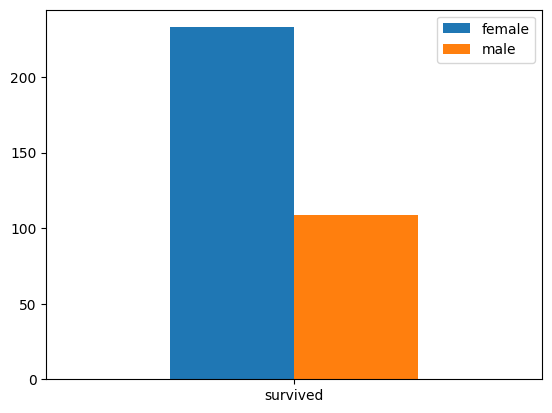

,female,male
survived,233,109


In [ ]:
plot_columns(x='Survived',y='Sex')

In [ ]:
# Survival rate

man_survival_rate = ((109)/(233+109))*100
female_survival_rate = ((233)/(233+109))*100
difference = female_survival_rate-man_survival_rate

In [ ]:
print(f"Male survived rate: {man_survival_rate:.2f} %")
print(f"Female survived rate: {female_survival_rate:.2f} %")
print(f"The percentage difference was: {difference:.2f} %")

Male survived rate: 31.87 %
Female survived rate: 68.13 %
The percentage difference was: 36.26 %


##  What was the survival rate for different passenger classes?


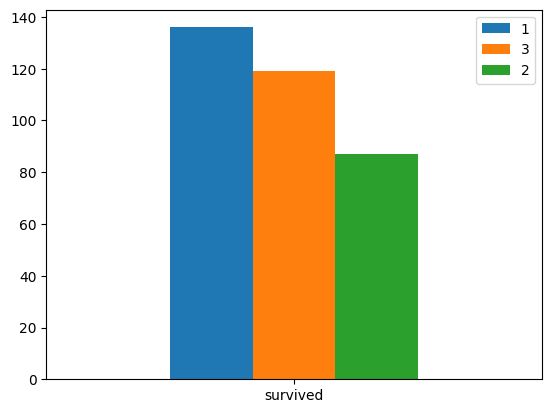

,1,3,2
survived,136,119,87


In [ ]:
plot_columns(x='Survived',y='Pclass')

In [ ]:
# Survival rate

upper_survival_rate = ((136)/(136+119+87))*100
middle_survival_rate = ((87)/(136+119+87))*100
lower_survival_rate = ((119)/(136+119+87))*100

print(f"Upper class survived rate: {upper_survival_rate:.2f} %")
print(f"Middle class survived rate: {middle_survival_rate:.2f} %")
print(f"Lower class survived rate: {lower_survival_rate:.2f} %")

Upper class survived rate: 39.77 %
Middle class survived rate: 25.44 %
Lower class survived rate: 34.80 %


##  Were passengers with family members more likely to survive than those without?

In [ ]:
'''Both sibsp and parch values represent families, so we can join the values between them to analyze the survival vs. family cases. '''


new_train_df['Family'] = (new_train_df['SibSp'] == 1) | (new_train_df['Parch'] == 1)
new_train_df['Family'] = new_train_df['Family'].replace({False: 'Alone', True: 'With Family'})

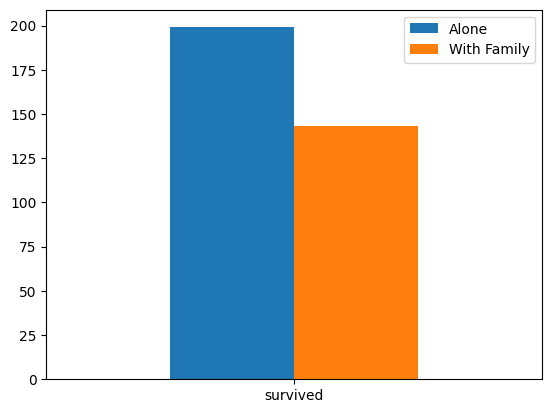

,Alone,With Family
survived,199,143


In [ ]:
plot_columns(x='Survived',y='Family')

In [ ]:
# Survival rate

Alone = ((199)/(199+143))*100
With_Family = ((143)/(199+143))*100
Difference_Family = Alone - With_Family

In [ ]:
print(f"The  survival rate of passengers without family was: {Alone:.2f} %")
print(f"The  survival rate of passengers with family was: {With_Family:.2f} %")
print(f"The difference of rate between them was: {Difference_Family:.2f} %")

The  survival rate of passengers without family was: 58.19 %
The  survival rate of passengers with family was: 41.81 %
The difference of rate between them was: 16.37 %


#  What was the average fare for each passenger class and how does it relate to survival?

In [ ]:
import seaborn as sns
import numpy as np

<Axes: xlabel='Fare', ylabel='Count'>

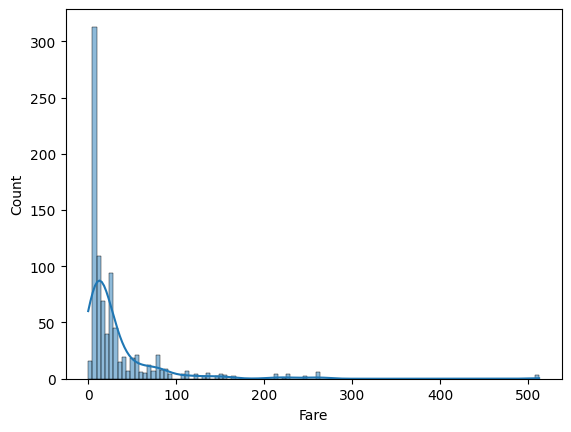

In [ ]:
sns.histplot(new_train_df['Fare'], kde=True)

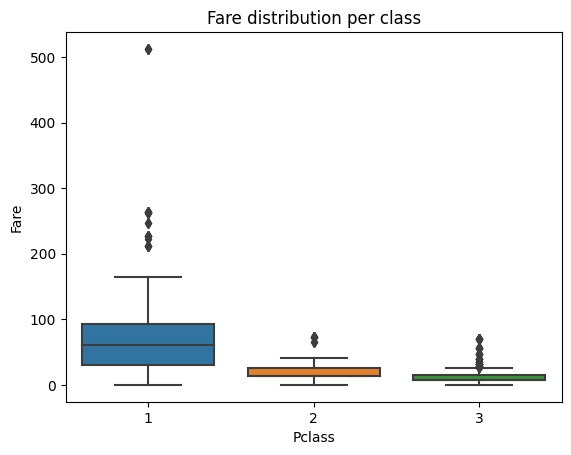

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=new_train_df)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare distribution per class')
plt.show()

In [ ]:
new_train_df['Fare'] = np.log(new_train_df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Count'>

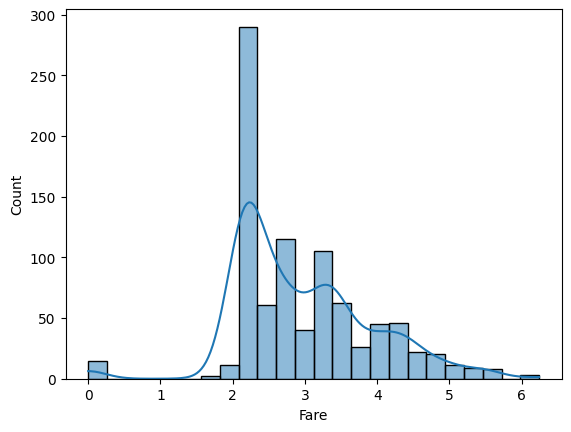

In [ ]:
sns.histplot(new_train_df['Fare'], kde=True)

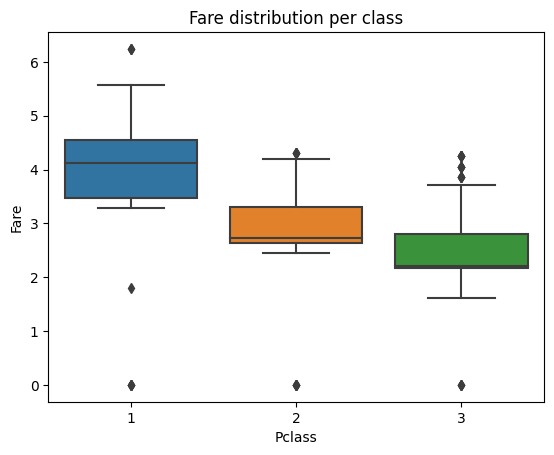

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=new_train_df)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare distribution per class')
plt.show()

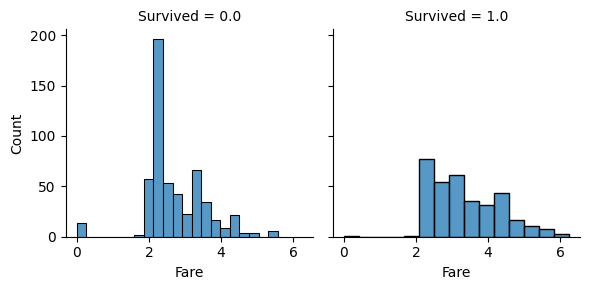

In [ ]:
Fare_survival = sns.FacetGrid(new_train_df, col = 'Survived')
Fare_survival.map(sns.histplot, 'Fare')

In [ ]:
#Where survived "0" is the amount of dead passangers, and "1" survived.

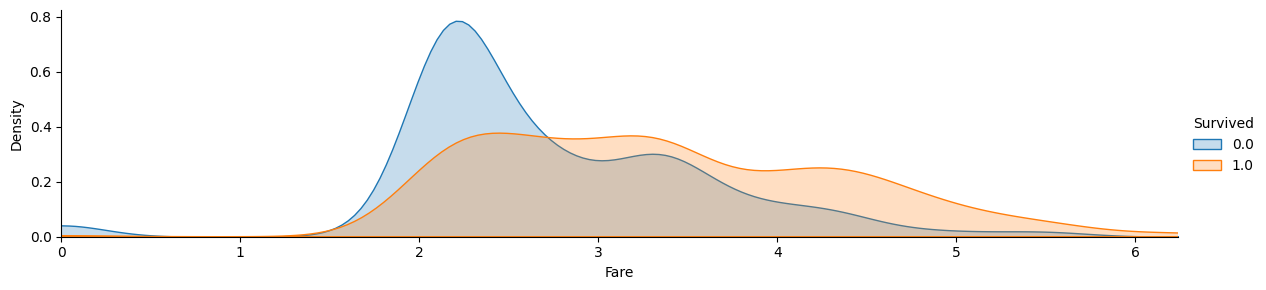

In [ ]:
age_analysis = sns.FacetGrid(new_train_df, hue="Survived",aspect=4)
age_analysis.map(sns.kdeplot,'Fare',fill= True)
age_analysis.set(xlim=(0, new_train_df['Fare'].max()))
age_analysis.add_legend()
plt.show()

## What age group had the highest survival rate?

<Axes: xlabel='Age', ylabel='Count'>

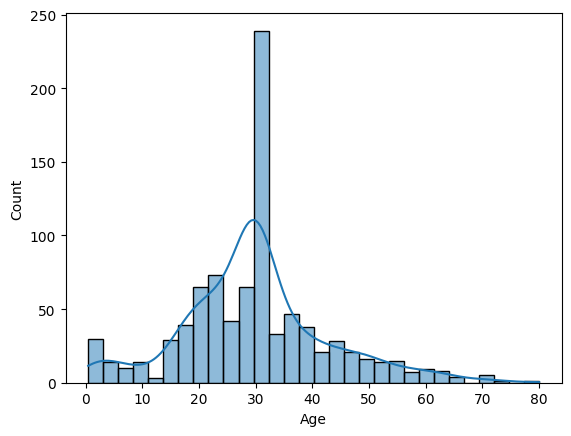

In [ ]:
sns.histplot(new_train_df['Age'], kde=True)

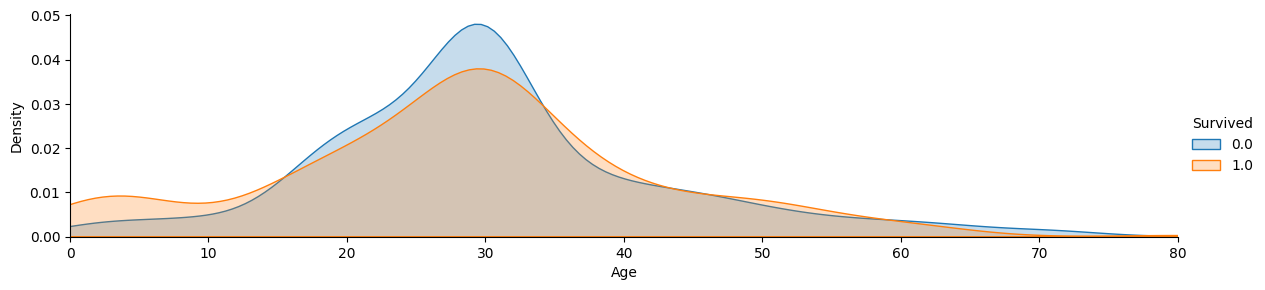

In [ ]:
age_analysis = sns.FacetGrid(new_train_df, hue="Survived",aspect=4)
age_analysis.map(sns.kdeplot,'Age',fill= True)
age_analysis.set(xlim=(0, new_train_df['Age'].max()))
age_analysis.add_legend()
plt.show()